<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
l = df['label']
d = df.drop('label',axis=1)
d

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22367,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22368,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22369,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22370,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
d.shape

(22372, 784)

In [5]:
l.shape

(22372,)

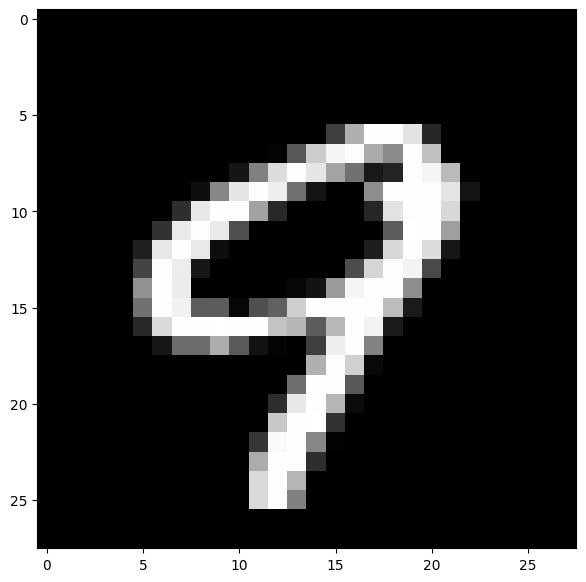

9


In [6]:
plt.figure(figsize = (7,7))
idx = 100

grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation = 'none',cmap = 'gray')
plt.show()

print(l[idx])

In [8]:
labels = l.head(15000)
data = d.head(15000)

print("the sahpe of the sample data = ",data.shape)
print("the sahpe of the sample labels = ",labels.shape)

the sahpe of the sample data =  (15000, 784)
the sahpe of the sample labels =  (15000,)


In [9]:
from sklearn.preprocessing import StandardScaler
standarized_data = StandardScaler().fit_transform(data)
standarized_data.shape

(15000, 784)

In [11]:
sample_data = standarized_data

covar_matrix = np.matmul(sample_data.T,sample_data)
print("The shape of  variance matrix =",covar_matrix.shape)

The shape of  variance matrix = (784, 784)


In [12]:
from scipy.linalg import eigh

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ", vectors.shape)
vectors = vectors.T
print("Shape of eigen vectors = ", vectors.shape)

Shape of eigen vectors =  (784, 2)
Shape of eigen vectors =  (2, 784)


In [18]:
import matplotlib.pyplot as plt

new_coordinates = np.matmul(vectors, sample_data.T)

print("resultant new data points shape", vectors.shape,"X",sample_data.T.shape, "=", new_coordinates.shape)


resultant new data points shape (2, 784) X (784, 15000) = (2, 15000)


In [19]:
new_coordinates = np.vstack((new_coordinates, labels)).T

dataframe = pd.DataFrame(data=new_coordinates, columns=("First Principal", "Second Principal", "label"))
dataframe.head()

,First Principal,Second Principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


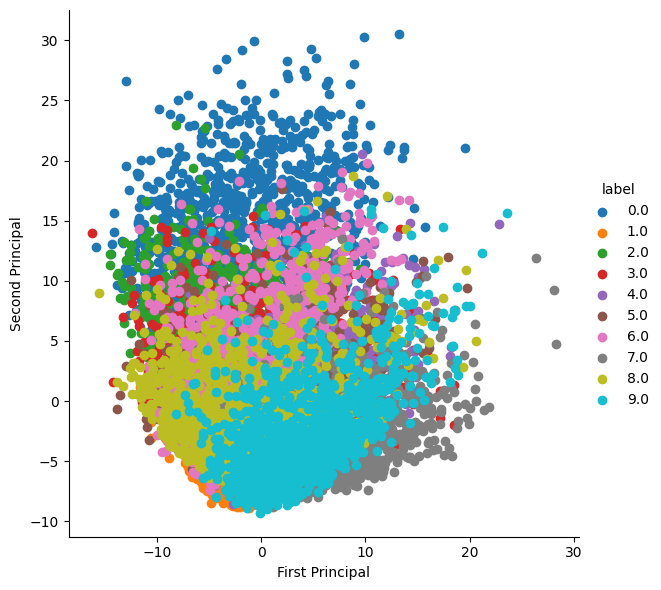

In [20]:
sns.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, "First Principal", "Second Principal").add_legend()
plt.show()

In [14]:
labels = labels.values.reshape(-1, 1)

In [16]:
from sklearn.manifold import TSNE

In [18]:
data_1000 = standarized_data[0:1000, :]
labels_1000 = labels[0:1000]

In [19]:
model = TSNE(n_components=2, random_state=0)

In [20]:
tsne_data = model.fit_transform(data_1000)

In [22]:
tsne_data = np.hstack((tsne_data, labels_1000))
tsne_df =  pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

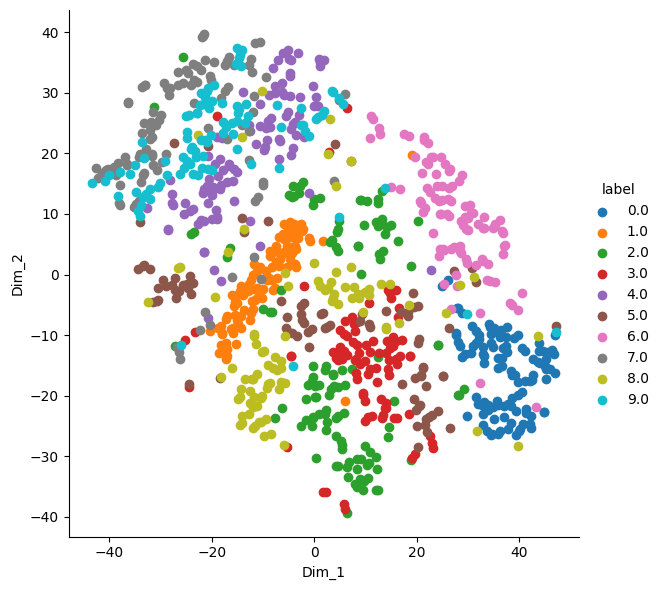

In [26]:
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

In [27]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000)

In [28]:
tsne_data = np.hstack((tsne_data, labels_1000))
tsne_df =  pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

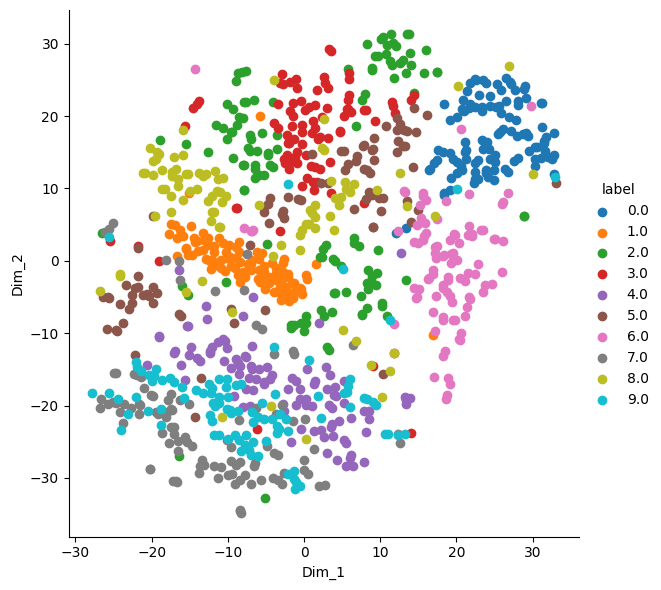

In [29]:
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

Running the same for 42k datapoints!

In [30]:
data_42k = standarized_data[0:42000, :]
labels_42k = labels[0:42000]

In [37]:
model_42k = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_data_42k = model_42k.fit_transform(data_42k)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [38]:
tsne_data_42k = np.hstack((tsne_data_42k, labels_42k))
tsne_df_42k =  pd.DataFrame(data=tsne_data_42k, columns=("Dim_1", "Dim_2", "label"))

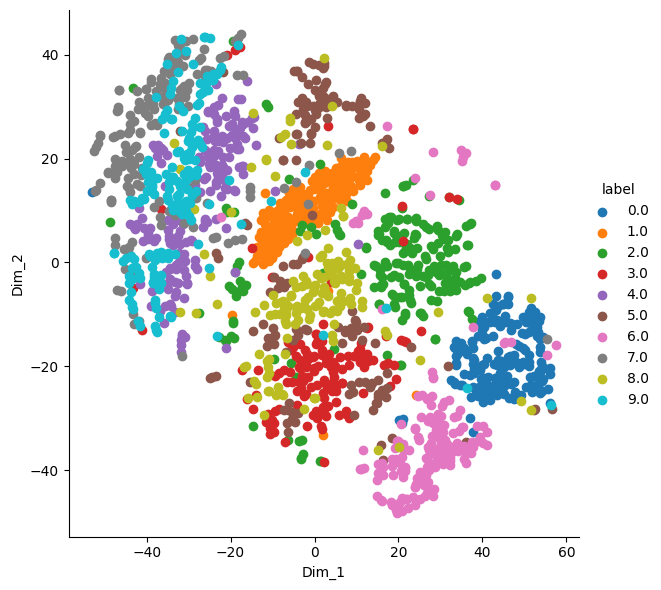

In [39]:
sns.FacetGrid(tsne_df_42k, hue="label", height=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()